In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset=pd.read_csv('/home/jiayi/5moU/data/DL_fromTombo/all_TGTGC.csv')
#dataset=pd.read_csv('/home/jiayi/5moU/data/DL_fromTombo/all_tombo.csv')
dataset

,indx,kmer,mean_1,mean_2,mean_3,mean_4,mean_5,std_1,std_2,std_3,...,mdintense_2,mdintense_3,mdintense_4,mdintense_5,L-1,L-2,L-3,L-4,L-5,label
0,239,TGTGC,-0.393038,0.108138,-0.113532,0.249268,-0.086032,0.161574,0.160491,0.073126,...,0.129871,-0.119397,0.330961,-0.123587,107,16,45,12,84,1
1,1169,TGTGC,0.577563,0.486387,-0.108924,-0.400086,-0.315799,0.066415,0.151296,0.282783,...,0.580229,-0.108924,-0.400086,-0.320487,11,5,2,2,42,1
2,179,TGTGC,0.187476,0.160928,-0.234632,0.034336,-0.355640,0.073017,0.150002,0.170773,...,0.162808,-0.207210,-0.014801,-0.353103,6,27,130,92,205,1
3,629,TGTGC,0.135409,-0.110499,-0.142222,0.176287,-0.148357,0.162376,0.035083,0.068957,...,-0.101557,-0.132215,0.229940,-0.183952,12,6,18,7,2952,1
4,135,TGTGC,-0.328761,-0.313913,-0.315879,-0.368903,-0.261595,0.019089,0.004242,0.065705,...,-0.313913,-0.313913,-0.356334,-0.246040,2,2,41,27,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13834,84,TGTGC,0.206723,0.212892,-0.338564,-0.329485,-0.370310,0.072448,0.178362,0.169781,...,0.160701,-0.337245,-0.316874,-0.364406,6,17,151,14,46,0
13835,12,TGTGC,-0.224099,-0.016030,-0.042468,0.269796,-0.131406,0.062839,0.149749,0.070616,...,-0.024357,-0.052460,0.326003,-0.114289,187,9,6,22,44,0
13836,942,TGTGC,0.186421,0.073605,-0.127920,0.148950,-0.254331,0.138621,0.517487,0.105292,...,-0.091806,-0.118036,0.194853,-0.237945,24,7,127,12,59,0
13837,262,TGTGC,-0.142096,-0.245403,-0.296681,-0.177880,-0.429734,0.295662,0.047933,0.116175,...,-0.251280,-0.295365,-0.178541,-0.440843,73,6,67,20,125,0


In [3]:
X = dataset.iloc[:, 2:-1].values
y = dataset. iloc [:, -1].values

In [4]:
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.2,
                                                    random_state=1234)

In [5]:
# Import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve

# Instantiate the classfiers and make a list
classifiers = [svm.SVC(probability=True), 
               RandomForestClassifier(n_estimators=100),
               XGBClassifier(learning_rate=0.01,
                      n_estimators=10,           # 树的个数-10棵树建立xgboost
                      max_depth=4,               # 树的深度
                      min_child_weight = 1,      # 叶子节点最小权重
                      gamma=0.,                  # 惩罚项中叶子结点个数前的参数
                      subsample=1,               # 所有样本建立决策树
                      colsample_btree=1,         # 所有特征建立决策树
                      scale_pos_weight=9,        # 解决样本个数不平衡的问题
                      random_state=27,           # 随机数
                      slient = 0)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc','precision','recall','AUPRC'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    ###
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    AUC = roc_auc_score(y_test, yproba)
    ###
    precision, recall, thresholds = precision_recall_curve(y_test,yproba)
    AUPRC=AUPRC_SVM=auc(recall,precision)

    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':AUC,
                                       'precision':precision,
                                       'recall': recall,
                                       'AUPRC': AUPRC}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

[09:45:03] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_btree", "slient" } are not used.



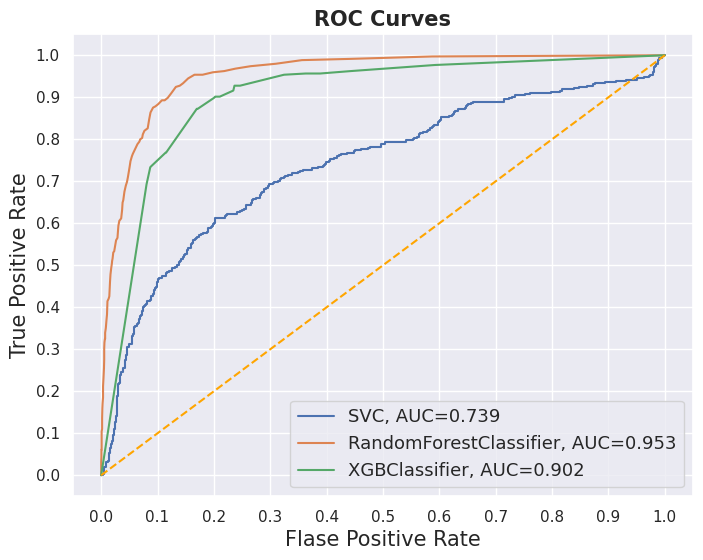

In [6]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curves', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

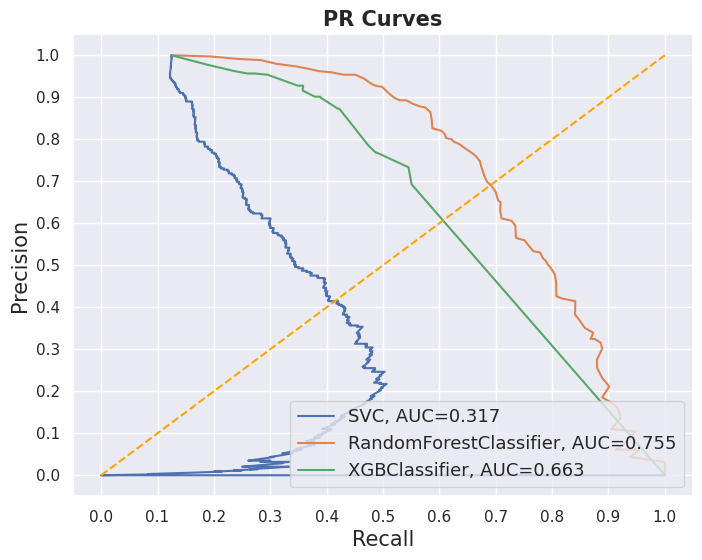

In [7]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['precision'], 
             result_table.loc[i]['recall'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['AUPRC']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Recall", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Precision", fontsize=15)

plt.title('PR Curves', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()